In [1]:
!pip install yfinance pandas numpy scikit-learn keras matplotlib

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------- ----------------------------- 0.8/3.0 MB 3.7 MB/s eta 0:00:01
     ---------- ----------------------------- 0.8/3.0 MB 3.7 MB/s eta 0:00:01
     ---------- ----------------------------- 0.8/3.0 MB 3.7 MB/s eta 0:00:01
     -------------- ------------------------- 1.0/3.0 MB 1.3 MB/s eta 0:00:02
     -------------- ------------------------- 1.0/3.0 MB 1.3 MB/s eta 0:00:02
     -------------- ------------------------- 1.0/3.0 MB 1.3 MB/s eta 0:00:02
     ----------------- ---------------------- 1.3/3.0 MB 771.6 kB/s eta 0:00:03
     ----------------- ---------------------- 1.3/3.0 MB 771.6 kB/s eta 0:00:03
     --------------------- ------------------ 1.6/3.0 MB 729.8 kB/s eta 0:00:02
     ------------------------ --------------- 1.8/3.0 MB 805.4 kB/s eta 0:00:02
     ------------------------ --------------- 1.8/3.0 MB 805.4 kB/s et

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
!pip install tensorflow

  Using cached wheel-0.44.0-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.8/385.2 MB 3.1 MB/s eta 0:02:06
   ---------------------------------------- 0.8/385.2 MB 3.1 MB/s eta 0:02:06
   ---------------------------------------- 0.8/385.2 MB 3.1 MB/s eta 0:02:06
   ---------------------------------------- 0.8/385.2 MB 3.1 MB/s eta 0:02:06
   ---------------------------------------- 0.8/385.2 MB 3.1 MB/s eta 0:02:06
   ---------------------------------------- 0.8/385.2 MB 3.1 MB/s eta 0:02:06
   ---------------------------------------- 1.0/385.2 MB 585.6 kB/s eta 0:10:56
   ---------------------------------------- 1.0/385.2 MB 585.6 kB/s eta 0:10:56
   ---------------------------------------- 1.3/385.2 MB 615.7 kB/s eta 0:10:24
   ---------------------------------------- 1.3/385.2 MB 615.7 kB/s eta 0:10:24
   ----

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [5]:
# Download historical market data
ticker = "AAPL"
data = yf.download(ticker, start="2010-01-01", end="2023-01-01")
print(data.head())

[*********************100%***********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.454505  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.465665  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.362818  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.351056  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.393280  447610800


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


C:\Users\EvanceOdhiambo\AppData\Local\Temp\ipykernel_6848\4169464654.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


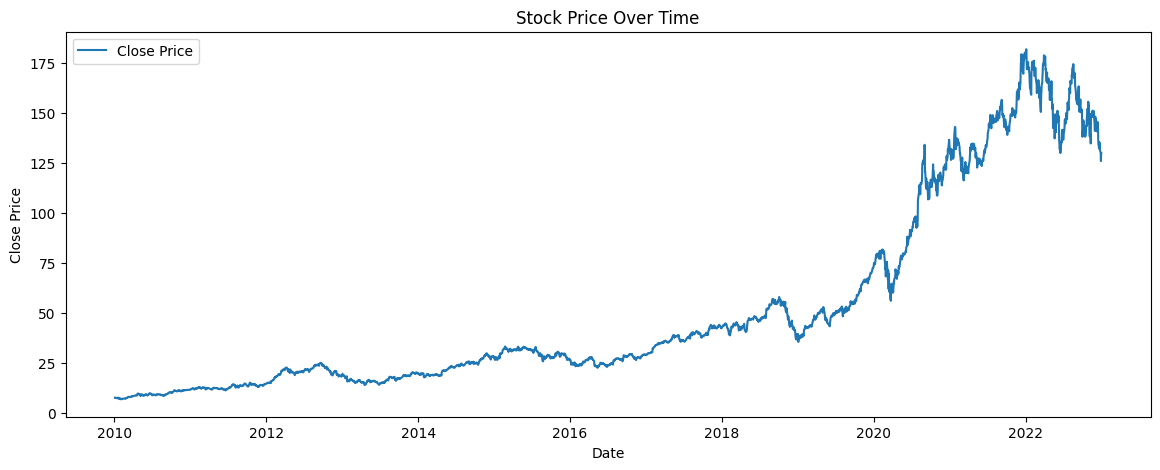

In [6]:
# Checking for missing values
print(data.isnull().sum())

# Fill missing values with forward fill method
data.fillna(method='ffill', inplace=True)

# Visualize the closing prices
plt.figure(figsize=(14, 5))
plt.plot(data['Close'], label='Close Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

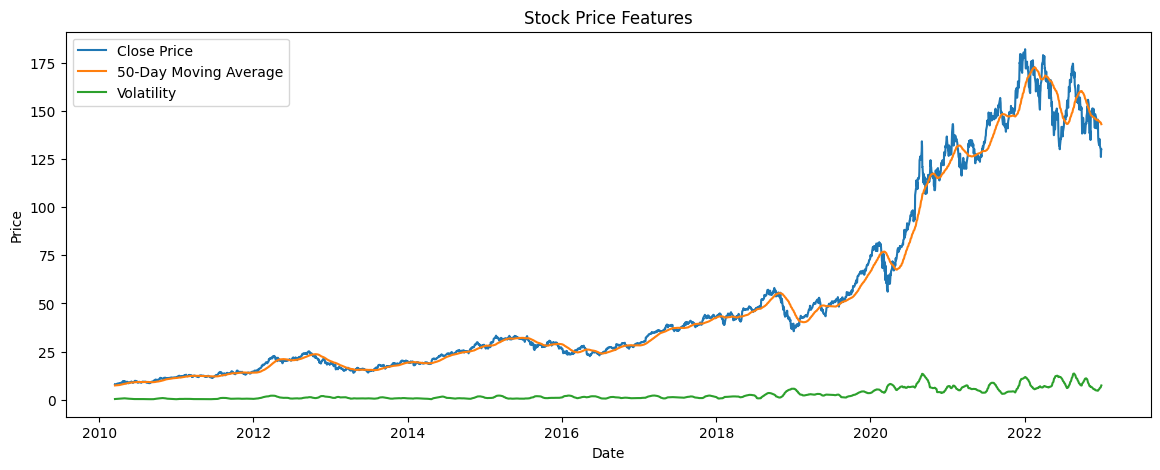

In [7]:
# Create a new column for the moving average
data['MA50'] = data['Close'].rolling(window=50).mean()

# Create a new column for the volatility
data['Volatility'] = data['Close'].rolling(window=50).std()

# Drop rows with NaN values created by rolling functions
data.dropna(inplace=True)

# Visualize the features
plt.figure(figsize=(14, 5))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA50'], label='50-Day Moving Average')
plt.plot(data['Volatility'], label='Volatility')
plt.title('Stock Price Features')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [8]:
# Prepare data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Create a data structure with 60 timesteps and 1 output
X_train, y_train = [], []
for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=1, batch_size=1)

C:\Users\EvanceOdhiambo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3163/3163 ━━━━━━━━━━━━━━━━━━━━ 213s 63ms/step - loss: 0.0015


In [10]:
# Make predictions
predictions = model.predict(X_train)
predictions = scaler.inverse_transform(predictions)

# Calculate RMSE
rmse = np.sqrt(np.mean(((predictions - scaler.inverse_transform(y_train.reshape(-1, 1)))**2)))
print(f'RMSE: {rmse}')

99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step
RMSE: 3.3534386344490468


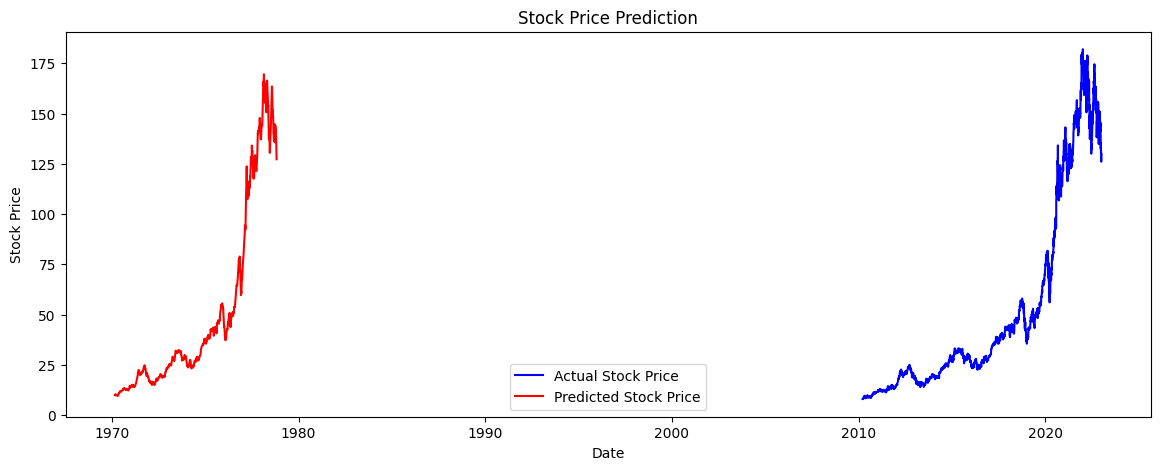

In [11]:
# Visualize the data
plt.figure(figsize=(14, 5))
plt.plot(data['Close'], color='blue', label='Actual Stock Price')
plt.plot(range(60, len(predictions) + 60), predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()